In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

import reload_recursive

import common
import preprocess_common
import preprocess_lda
import train_common
import train_lda
import user_profile
import preprocess_bert
import train_bert

%reload common
%reload preprocess_common
%reload preprocess_lda
%reload train_common
%reload train_lda
%reload user_profile
%reload preprocess_bert
%reload train_bert

import common
import preprocess_common
import preprocess_lda
import train_common
import train_lda
import user_profile
import preprocess_bert
import train_bert

import logging
from pprint import pprint
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.WARN, force=True)
plt.rc('font', size=24)
figsize = (8, 8)
wc_figsize = (16, 16)

publications, users, authors_raw = common.load_raw_datasets()
authors = authors_raw[authors_raw['state'] == 'validatAcceptat']
authors_negative = authors_raw[authors_raw['state'] == 'validatRefuzat']
common_dataset_cached = True
lda_dataset_cached = True
bert_dataset_cached = True

lda_visualize_results = True
lda_visualize_test_results = True
bert_visualize_test_results = True
bert_visualize_results = True

lda_model_cached = True
bert_model_cached = False


split_cfg = train_common.TrainConfig(cv_size=0.2, test_size=0.2)

In [2]:
if not common_dataset_cached:
    nlp = preprocess_common.init_nlp()
    publications_en = preprocess_common.preprocess_publications_common(publications, nlp)
else:
    publications_en = common.load_dataframe("publications_en")

In [3]:
if not lda_dataset_cached:
    publications_lda = preprocess_lda.preprocess_lda(publications_en)
else:
    publications_lda = common.load_dataframe("publications_lda")

In [38]:
if not bert_dataset_cached:
    publications_bert = preprocess_bert.preprocess_bert(publications_en)
else:
    publications_bert = common.load_dataframe("publications_bert")

  0%|          | 0/39045 [00:00<?, ?it/s]

/home/david/PycharmProjects/licenta/common.py:21: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['title', 'abstract_text', 'publication_type', 'no_pages', 'd_oi',
       'category', 'file_link', 'external_link', 'publisher', 'w_os',
       'jhi_type', 'keywords', 'publication_date', 'authors', 'metadata',
       'internal_link', 'photo_link', 'language', 'abstract_text_clean'],
      dtype='object')]

  df.to_hdf(f'{name}.hdf', key='df', mode='w')


In [40]:
publications_train, publications_cv, publications_test =\
    train_common.split_train_cv_test_simple(publications_lda, split_cfg)

authors_train, authors_cv, authors_test = \
    train_common.split_authors_by_publications(\
       publications_train, publications_cv, publications_test, authors)

authors_negative_train, authors_negative_cv, authors_negative_test = \
    train_common.split_authors_by_publications(\
       publications_train, publications_cv, publications_test, authors_negative)

  0%|          | 0/145373 [00:00<?, ?it/s]

  0%|          | 0/145373 [00:00<?, ?it/s]

  0%|          | 0/145373 [00:00<?, ?it/s]

  0%|          | 0/25425 [00:00<?, ?it/s]

  0%|          | 0/25425 [00:00<?, ?it/s]

  0%|          | 0/25425 [00:00<?, ?it/s]

In [41]:
publications_bert_train, publications_bert_cv, publications_bert_test = \
    train_common.split_train_cv_test_simple(publications_bert, split_cfg)

authors_bert_train, authors_bert_cv, authors_bert_test = \
    train_common.split_authors_by_publications(\
        publications_bert_train, publications_bert_cv, publications_bert_test, authors)

authors_negative_bert_train, authors_negative_bert_cv, authors_negative_bert_test = \
    train_common.split_authors_by_publications(\
        publications_bert_train, publications_bert_cv, publications_bert_test, authors_negative)

  0%|          | 0/145373 [00:00<?, ?it/s]

  0%|          | 0/145373 [00:00<?, ?it/s]

  0%|          | 0/145373 [00:00<?, ?it/s]

  0%|          | 0/25425 [00:00<?, ?it/s]

  0%|          | 0/25425 [00:00<?, ?it/s]

  0%|          | 0/25425 [00:00<?, ?it/s]

In [7]:
if not lda_model_cached:
    lda_cfg = train_lda.LDAConfig()
    lda_cfg.num_topics = 10
    lda_cfg.chunksize = 5000
    lda_cfg.passes = 6
    lda_cfg.iterations = 400
    lda_cfg.eval_every = 1
    lda_cfg.no_below = 20
    lda_cfg.no_above = 0.5
    lda_cfg.metric = 'cos'
    lda_cfg.fpr_samples_from = 0
    lda_cfg.fpr_samples_to = 1
    lda_cfg.fpr_samples_count = 1000
    lda_cfg.num_negative_examples_to_positive_examples = 1
    lda, publications_train_lda, publications_cv_lda, authors_cv_lda,\
        authors_negative_cv_lda, users_features_lda, result = \
        train_lda.train_and_evaluate_lda(publications_train, publications_cv, authors_train,
                                         authors_cv, authors_negative_cv, users, lda_cfg,
                                         debug_logging=True, save_model=True,
                                         random_negative_examples=True, plot=True)
    pprint(result)
    common.save_dataframe(publications_train_lda, "publications_train_lda")
    common.save_dataframe(publications_cv_lda, "publications_cv_lda")
    common.save_dataframe(authors_cv_lda, "authors_cv_lda")
    common.save_dataframe(authors_negative_cv_lda, "authors_negative_cv_lda")
    common.save_dataframe(users_features_lda, "users_features_lda")
else:
    lda = train_lda.load_lda_model()
    publications_train_lda = common.load_dataframe("publications_train_lda")
    publications_cv_lda = common.load_dataframe("publications_cv_lda")
    authors_cv_lda = common.load_dataframe("authors_cv_lda")
    authors_negative_cv_lda = common.load_dataframe("authors_negative_cv_lda")
    users_features_lda = common.load_dataframe("users_features_lda")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/home/david/PycharmProjects/licenta/common.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


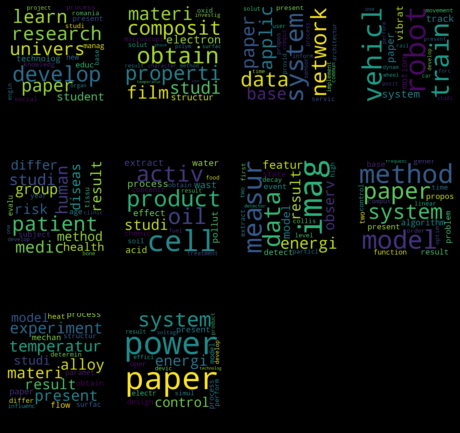

In [42]:
%matplotlib inline
if lda_visualize_results:
    train_lda.visualize_topics(lda, figsize=figsize, coherence="c_npmi")

  0%|          | 0/16596 [00:00<?, ?it/s]

  0%|          | 0/2211 [00:00<?, ?it/s]

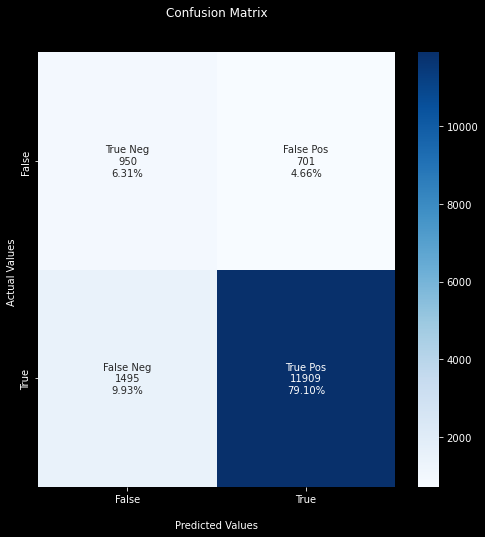

Precision: 0.8541348389239455
F1 score: 0.9155839163527332


In [9]:
%reload user_profile
import user_profile
# plt.rc('font', size=24)
if lda_visualize_results:
    positive_scores = user_profile.eval_topics_scores(publications_cv_lda,
                                                      users_features_lda, authors_cv,
                                                      progress=True,
                                                      metric=lda.cfg.metric)['score']
    negative_scores = user_profile.eval_topics_scores(publications_cv_lda,
                                                      users_features_lda,
                                                      authors_negative_cv,
                                                      progress=True,
                                                      metric=lda.cfg.metric)['score']
    t = lda.cfg.threshold
    user_profile.plot_confusion_matrix(positive_scores, negative_scores, t, figsize=figsize)
    tn, fp, fn, tp = user_profile.get_confusion_matrix(positive_scores, negative_scores,
                                                       t).ravel()
    precision = user_profile.get_precision(tn, fp, fn, tp)
    print(f"Precision: {precision}")
    f1 = user_profile.get_f1_score(tn, fp, fn, tp)
    print(f"F1 score: {f1}")

  0%|          | 0/18804 [00:00<?, ?it/s]

  0%|          | 0/2483 [00:00<?, ?it/s]

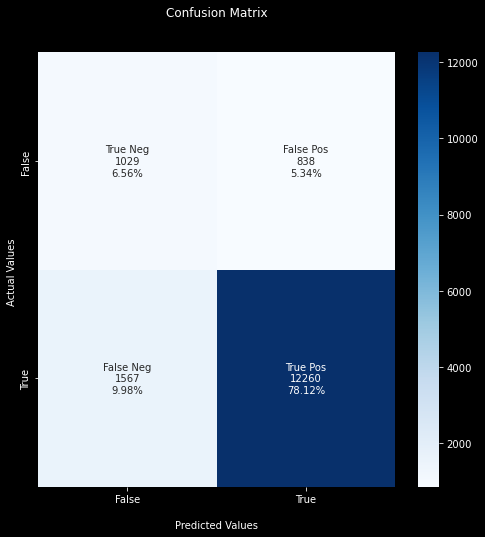

Precision: 0.8467567223142602
F1 score: 0.910677808727948


In [10]:
if lda_visualize_test_results:
    publications_test_lda = train_lda.eval_lda(lda, publications_test)
    positive_scores = user_profile.eval_topics_scores(publications_test_lda,
                                                      users_features_lda,
                                                      authors_test,
                                                      progress=True,
                                                      metric=lda.cfg.metric)['score']
    negative_scores = user_profile.eval_topics_scores(publications_test_lda,
                                                      users_features_lda,
                                                      authors_negative_test,
                                                      progress=True,
                                                      metric=lda.cfg.metric)['score']
    user_profile.plot_confusion_matrix(positive_scores, negative_scores,
                                       lda.cfg.threshold, figsize=figsize)
    tn, fp, fn, tp = user_profile.get_confusion_matrix(positive_scores, negative_scores,
                                                       lda.cfg.threshold).ravel()
    precision = user_profile.get_precision(tn, fp, fn, tp)
    print(f"Precision: {precision}")
    f1 = user_profile.get_f1_score(tn, fp, fn, tp)
    print(f"F1 score: {f1}")

In [11]:
import torch
torch.cuda.empty_cache()
torch.cuda.ipc_collect()

Model: ROC AUC=0.9712016047889841


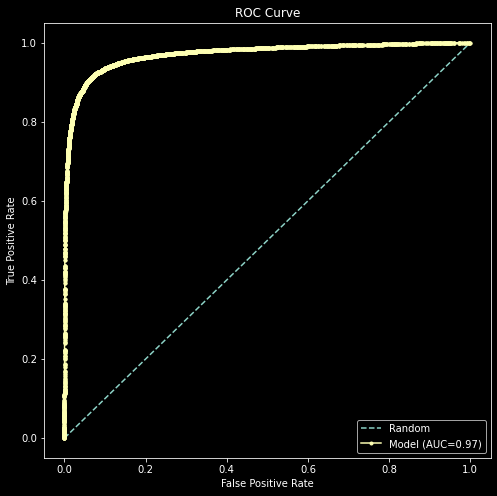

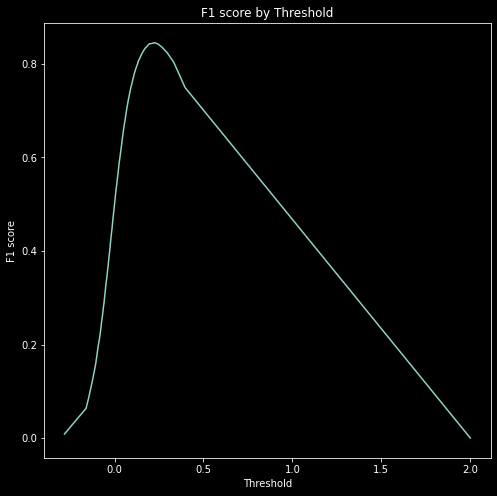

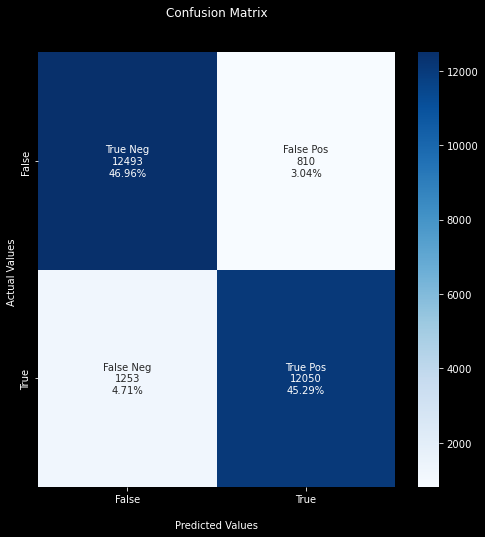

{'auc': 0.9712016047889841, 'phi_score': 0.8453910722516288, 'f1_score': 0.9211481863700646, 'precision': 0.9224610990002255, 'tn': 12493, 'fp': 810, 'fn': 1253, 'tp': 12050, 'embedding_model': 'all-MiniLM-L6-v2', 'device': 'cuda', 'n_components': 12, 'batch_size': 32, 'fpr_samples_from': 0, 'fpr_samples_to': 1, 'fpr_samples_count': 100, 'threshold': 0.22504949801489155, 'normalize_features': False, 'threshold_overwrite': None, 'metric': 'cosine', 'umap_metric': 'cosine', 'umap_n_neighbors': 10, 'umap_min_dist': 0, 'reducer': 'none', 'verbose': False, 'use_scaler': False, 'clustering_algorithm': 'kmeans', 'n_clusters': 10, 'random_state': 1}


/home/david/PycharmProjects/licenta/common.py:21: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['title', 'abstract_text', 'publication_type', 'no_pages', 'd_oi',
       'category', 'file_link', 'external_link', 'publisher', 'w_os',
       'jhi_type', 'keywords', 'publication_date', 'authors', 'metadata',
       'internal_link', 'photo_link', 'language', 'abstract_text_clean',
       'embeddings', 'embeddings_sentence_model', 'feature'],
      dtype='object')]

  df.to_hdf(f'{name}.hdf', key='df', mode='w')
/home/david/PycharmProjects/licenta/common.py:21: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['last_name', 'initials', 'first_name', 'email_address', 'jhi_type',
       'publication_features', 'publication_ids', 'f

In [164]:
if not bert_model_cached:
    bert_conf = train_bert.BERTConfig()
    bert_conf.embedding_model = "all-MiniLM-L6-v2"
    bert_conf.device = "cuda"
    bert_conf.n_components = 12
    bert_conf.batch_size = 32
    bert_conf.fpr_samples_from = 0
    bert_conf.fpr_samples_to = 1
    bert_conf.fpr_samples_count = 100
    bert_conf.normalize_features = False
    bert_conf.metric = "cosine"
    bert_conf.umap_metric = "cosine"
    bert_conf.reducer = "none"
    bert_conf.use_scaler = False
    bert_conf.umap_min_dist = 0
    bert_conf.umap_n_neighbors = 10
    bert_conf.clustering_algorithm = "kmeans"
    bert_conf.n_clusters = 10
    bert_conf.random_state = 1

    bert, publications_bert_train, publications_bert_cv, authors_bert_cv,\
        authors_negative_bert_cv, users_features_bert, performance_report = \
        train_bert.train_and_evaluate_bert(\
            publications_bert_train, publications_bert_cv, authors_bert_train, authors_bert_cv,
            authors_negative_bert_cv, users, bert_conf, save_model=True, plot=True,
            random_negative_examples=True, recalculate_embeddings=False, progress=True,
            figsize=figsize)
    print(performance_report)

    publications_bert_test = train_bert.eval_bert(bert, publications_bert_test,
                                                  recalculate_embeddings=False, progress=True)

    common.save_dataframe(publications_bert_train, "publications_bert_train2")
    common.save_dataframe(publications_bert_cv, "publications_bert_cv2")
    common.save_dataframe(publications_bert_test, "publications_bert_test2")
    
    common.save_dataframe(authors_bert_cv, "authors_bert_cv")
    common.save_dataframe(authors_negative_bert_cv, "authors_negative_bert_cv")
    common.save_dataframe(users_features_bert, "users_features_bert")
else:
    publications_bert_train = common.load_dataframe("publications_bert_train2")
    publications_bert_cv = common.load_dataframe("publications_bert_cv2")
    publications_bert_test = common.load_dataframe("publications_bert_test2")
    
    authors_bert_cv = common.load_dataframe("authors_bert_cv")
    authors_negative_bert_cv = common.load_dataframe("authors_negative_bert_cv")
    users_features_bert = common.load_dataframe("users_features_bert")
    
    bert = train_bert.load_bert_model()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21428/21428 [00:01<00:00, 19604.45it/s]
/home/david/PycharmProjects/licenta/common.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

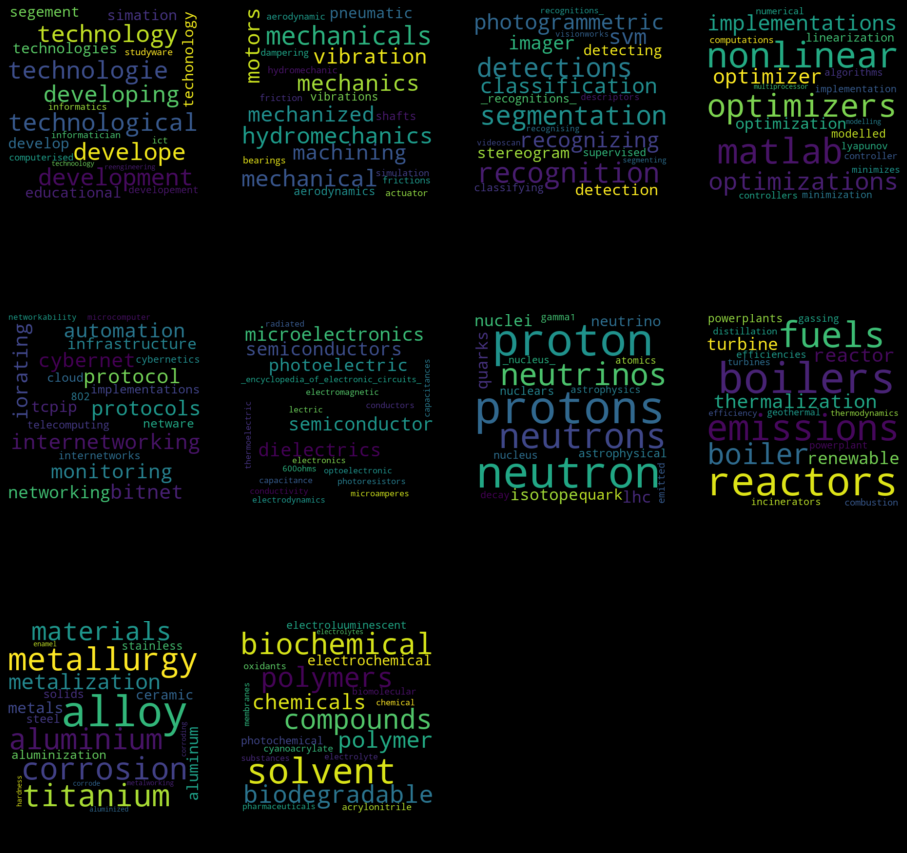

In [163]:
%reload train_bert
import train_bert

if bert_visualize_results:
    try:
        word_embeddings
        words
    except NameError:
        word_embeddings = None
        words = None

    coherence, word_embeddings, words = \
        train_bert.get_coherence(
            bert, publications_bert_train_abstracts=publications_bert_train['abstract_text_clean'],
            word_embeddings=word_embeddings, words=words, coherence="c_npmi",
            plot=True, figsize=wc_figsize, top_words=20)
    print(f"Coherence = {coherence}")

  0%|          | 0/13303 [00:00<?, ?it/s]

  0%|          | 0/1742 [00:00<?, ?it/s]

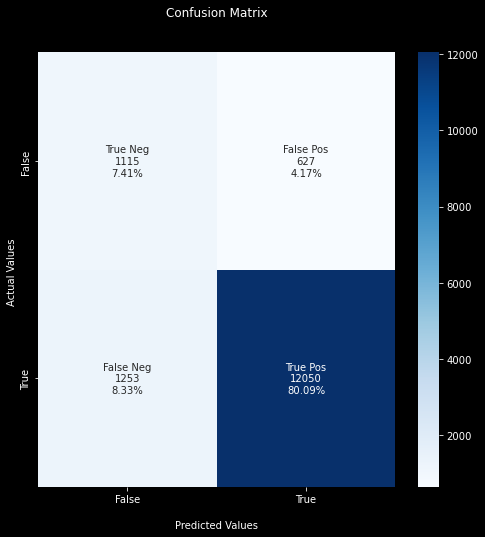

Precision: 0.8750415420405451
F1 score: 0.9276366435719784


In [165]:
if bert_visualize_results:
    positive_scores = user_profile.eval_topics_scores(publications_bert_cv, users_features_bert,
                                                      authors_bert_cv,
                                                      progress=True,
                                                      metric=bert.cfg.metric)['score']
    negative_scores = user_profile.eval_topics_scores(publications_bert_cv,
                                                      users_features_bert,
                                                      authors_negative_bert_cv,
                                                      progress=True,
                                                      metric=bert.cfg.metric)['score']
    user_profile.plot_confusion_matrix(positive_scores, negative_scores,
                                       bert.cfg.threshold,
                                       figsize=figsize)
    tn, fp, fn, tp = user_profile.get_confusion_matrix(positive_scores, negative_scores,
                                                       bert.cfg.threshold).ravel()
    precision = user_profile.get_precision(tn, fp, fn, tp)
    print(f"Precision: {precision}")
    f1 = user_profile.get_f1_score(tn, fp, fn, tp)
    print(f"F1 score: {f1}")

  0%|          | 0/16297 [00:00<?, ?it/s]

  0%|          | 0/2208 [00:00<?, ?it/s]

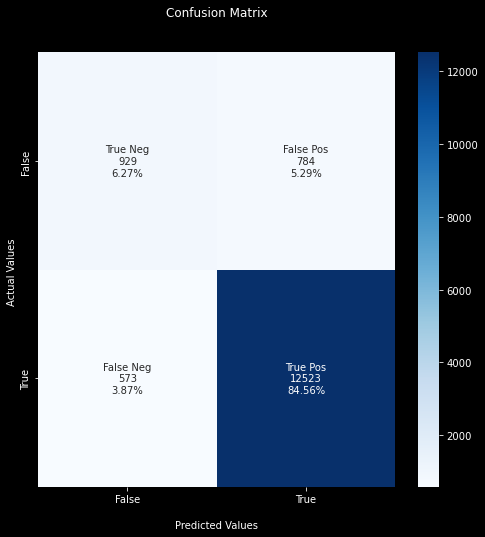

Precision: 0.9083665338645418
F1 score: 0.9486043252660683


In [160]:
if bert_visualize_test_results:
    threshold = bert.cfg.threshold
    positive_scores = user_profile.eval_topics_scores(publications_bert_test, users_features_bert,
                                                      authors_bert_test,
                                                      progress=True, metric=bert.cfg.metric)['score']
    negative_scores = user_profile.eval_topics_scores(publications_bert_test,
                                                      users_features_bert,
                                                      authors_negative_bert_test,
                                                      progress=True,
                                                      metric=bert.cfg.metric)['score']
    user_profile.plot_confusion_matrix(positive_scores, negative_scores, threshold, figsize=figsize)
    tn, fp, fn, tp = user_profile.get_confusion_matrix(positive_scores, negative_scores,
                                                       threshold).ravel()
    precision = user_profile.get_precision(tn, fp, fn, tp)
    print(f"Precision: {precision}")
    f1 = user_profile.get_f1_score(tn, fp, fn, tp)
    print(f"F1 score: {f1}")


====== False Negative ======

The paper describes a SBC-based weather server. Its main advantages over traditional architectures are greater flexibility, lower costs, and higher reliability in the field. By using a proper enclosure, the weather server can be operated outdoors in remote locations, and it can provide information on the main weather parameters such as wind direction average and maximum speed, atmospheric pressure momentary and maximal for the day, temperature, illumination, short term forecasts, etc., in the form of an easy to read webpage that also allows for commands to be passed to the weather server. A networked weather server operates in a distributed monitoring system, covering large geographical areas and helping forecasts with local data. ?? 2008. All rights reserved.

====== True user publications ======

['The study of the arterial hemodynamics has triggered intense numerical work aimed at understanding the underlying transport mechanisms of solutes (eg, oxygen

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

                        similarity
distributed monitoring    0.378048
weather server            0.349229
monitoring                0.289320
networked weather         0.286569
monitoring covering       0.251641
operates distributed      0.250199
distributed               0.221281
remote locations          0.192243
outdoors remote           0.190958
server operated           0.190928
server                    0.190062
based weather             0.188025
server networked          0.186627
local data                0.180769
server operates           0.171685
networked                 0.170807
architectures             0.165454
server main               0.160398
weather parameters        0.155684
data                      0.147740

====== User keywords ======



Batches:   0%|          | 0/30 [00:00<?, ?it/s]

                       similarity
flow simulation          0.185492
flow conductivity        0.177564
flow dynamics            0.169842
flow electrical          0.168397
flow characteristics     0.166428
numerical simulation     0.151641
electrodes study         0.150708
flow vessel              0.147507
modeling numerical       0.145132
mathematical modeling    0.141519
fem numerical            0.139391
vessel models            0.138300
parameters flow          0.135524
flow investigated        0.134997
vessel interactions      0.134470
flow interaction         0.133878
flow complex             0.131130
flow coupled             0.130495
magnet study             0.128870
simulation artery        0.127978
User Profile:
[ 0.82218263  0.69197869  1.89712948 -1.00658111 -3.92858974  0.09372398
 -1.42316875 -0.07753766 -1.14154206 -0.40734625 -0.55501971  4.09658247
  0.4020351   0.74930792 -2.93073087]
Publication Feature:
[-6.77675937 -0.35848282 -4.03583148 -0.27277458  2.54835766  4.204

Exception: metric must be 'cos', 'dot', 'norm' or 'euclidean

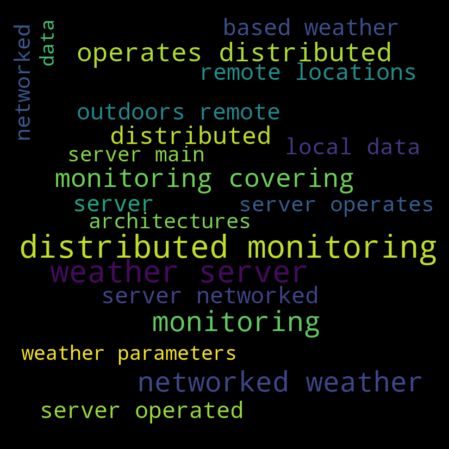

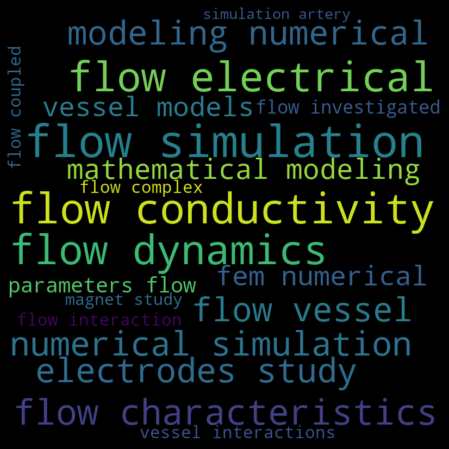

In [163]:
%reload common
import common

random_state = None
target = 'false_negative'

false_positives = authors_negative_bert_cv[authors_negative_bert_cv['score'] > 0]
false_negatives = authors_bert_cv[authors_bert_cv['score'] <= 0]
if target == 'false_positive':
    sample = false_positives.sample(1, random_state=random_state)
else:
    sample = false_negatives.sample(1, random_state=random_state)
pub_sample = publications_bert_cv.loc[sample['publication_id']]
pub = pub_sample.iloc[0]
user = users_features_bert.loc[sample['user_id']].iloc[0]
user_publications = common.publications_for_user(publications_bert_train, authors_bert_train, user.name)
if target == 'false_positive':
    print("\n====== False Positive ======\n")
else:
    print("\n====== False Negative ======\n")
print(pub['abstract_text'])
print("\n====== True user publications ======\n")
print(user_publications['abstract_text'].tolist())

print("\n====== Paper keywords ======\n")
print(train_bert.get_top_words(bert, pub['feature'], publications=pub_sample,
                               ngram_range=(1, 2), figsize=figsize, plot=True))

print("\n====== User keywords ======\n")
print(train_bert.get_top_words(bert, user['profile'], publications=user_publications,
                               ngram_range=(1, 2), figsize=figsize, plot=True))
print("User Profile:")
print(user['profile'])
print("Publication Feature:")
print(pub['feature'])
print(f"Similarity: {user_profile.eval_score_simple(user['profile'], pub['feature'], bert.cfg.metric)}")
print(f"Threshold : {bert.cfg.threshold}")

1 min publications: 13303 total positives; 1742 total negatives; 627 fp; 1253 fn; 0.35993111366245695 fp rate; 0.09418928061339547 fn rate; 
3 min publications: 10942 total positives; 1490 total negatives; 566 fp; 817 fn; 0.37986577181208053 fp rate; 0.07466642295741181 fn rate; 
5 min publications: 9751 total positives; 1396 total negatives; 533 fp; 684 fn; 0.3818051575931232 fp rate; 0.07014665162547432 fn rate; 
7 min publications: 8994 total positives; 1313 total negatives; 517 fp; 643 fn; 0.39375476009139376 fp rate; 0.07149210584834334 fn rate; 
10 min publications: 8039 total positives; 1125 total negatives; 484 fp; 579 fn; 0.43022222222222223 fp rate; 0.07202388356760792 fn rate; 
15 min publications: 7028 total positives; 949 total negatives; 435 fp; 509 fn; 0.458377239199157 fp rate; 0.0724245873648264 fn rate; 
20 min publications: 6093 total positives; 777 total negatives; 358 fp; 442 fn; 0.46074646074646075 fp rate; 0.07254226161168555 fn rate; 
25 min publications: 5457 t

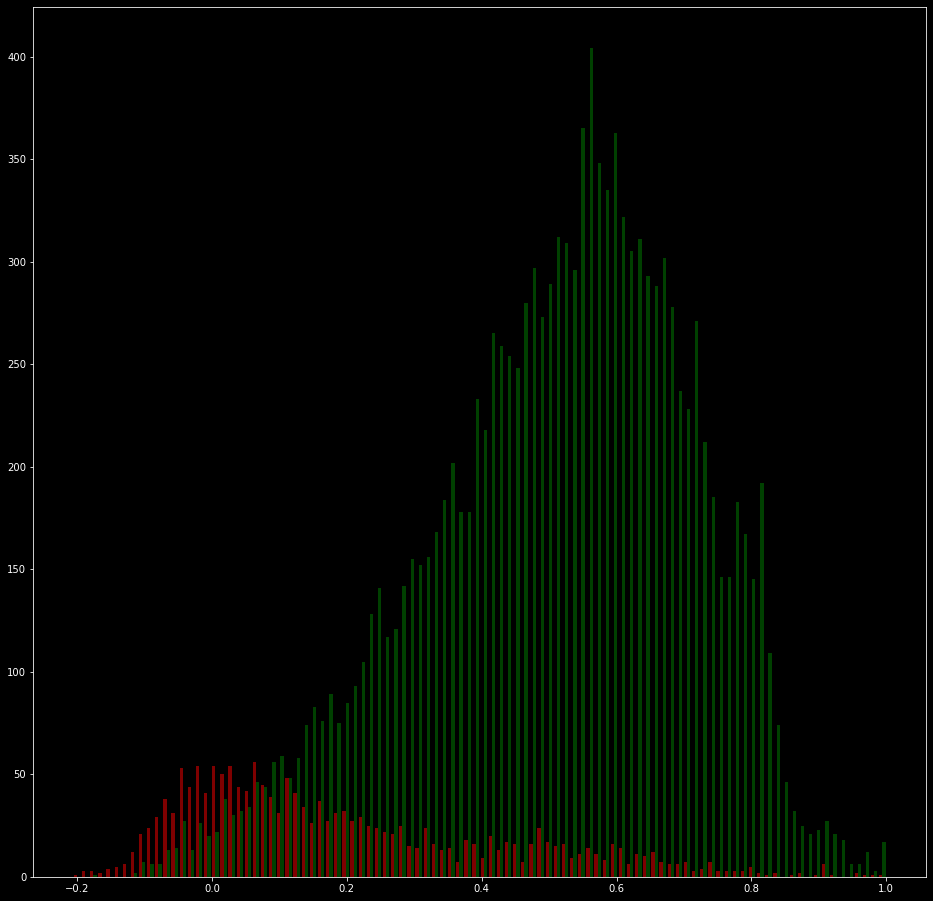

In [166]:
import seaborn as sns

for min_num_publications in [1, 3, 5, 7, 10, 15, 20, 25, 35, 50, 75, 100]:
    false_positives = authors_negative_bert_cv[authors_negative_bert_cv['score'] >= bert.cfg.threshold]
    false_negatives = authors_bert_cv[authors_bert_cv['score'] < bert.cfg.threshold]

    users_features_bert['num_publications'] = users_features_bert['publication_ids'].apply(len)
    users_features_bert['num_publications'].describe()

    users_features_bert_many_publications = users_features_bert[\
        users_features_bert['num_publications'] >= min_num_publications]

    authors_negative_bert_cv_many_publications = authors_negative_bert_cv[\
        authors_negative_bert_cv['user_id'].apply(\
            lambda user_id: user_id in users_features_bert_many_publications.index)]
    authors_bert_cv_many_publications = authors_bert_cv[\
        authors_bert_cv['user_id'].apply(\
            lambda user_id: user_id in users_features_bert_many_publications.index)]

    false_positives_many_publications = false_positives[\
        false_positives['user_id'].apply(lambda user_id: user_id in users_features_bert_many_publications.index)]
    false_negatives_many_publications = false_negatives[\
        false_negatives['user_id'].apply(lambda user_id: user_id in users_features_bert_many_publications.index)]
    
    print(f"{min_num_publications} min publications: "+
          f"{len(authors_bert_cv_many_publications)} total positives; "+
          f"{len(authors_negative_bert_cv_many_publications)} total negatives; "+
          f"{len(false_positives_many_publications)} fp; "+
          f"{len(false_negatives_many_publications)} fn; "+
          f"{len(false_positives_many_publications)/len(authors_negative_bert_cv_many_publications)} fp rate; "+
          f"{len(false_negatives_many_publications)/len(authors_bert_cv_many_publications)} fn rate; ")

plt.figure(figsize=(16, 16))
plt.hist([authors_negative_bert_cv['score'], authors_bert_cv['score']],
             color=['r','g'], alpha=0.5, bins=100)
pass

In [150]:
authors_negative_bert_cv

,state,visible,user_id,publication_id,order_number,topics_scores,score
id,,,,,,,
5280,validatRefuzat,1.0,1483,725.0,0.0,0.584909,0.584909
6290,validatRefuzat,1.0,584,989.0,1.0,0.822853,0.822853
6326,validatRefuzat,1.0,6563,998.0,0.0,0.808519,0.808519
6372,validatRefuzat,1.0,6580,1008.0,0.0,0.883111,0.883111
6373,validatRefuzat,1.0,584,1008.0,1.0,0.941169,0.941169
...,...,...,...,...,...,...,...
2737500,validatRefuzat,1.0,545,136376.0,2.0,0.451953,0.451953
2737505,validatRefuzat,1.0,1550,136376.0,8.0,0.521485,0.521485
2741746,validatRefuzat,1.0,793,63386.0,4.0,0.213600,0.213600


In [8]:
import itertools
import time
%reload train_bert
import train_bert
pca_num_components = [5, 10, 12, 15, 20, 25, 35, 50, 75, 100]
normalize_features = [False, True]
metric = ['dot', 'cos', 'norm']
choices = list(itertools.product(pca_num_components, normalize_features, metric))
np.random.shuffle(choices)
results = []
filename = f"results_bert_{int(time.time())}"
i = 0
for pca_num_components, normalize_features, metric in tqdm(choices):
    bert_conf = train_bert.BERTConfig()
    bert_conf.embedding_model = "all-mpnet-base-v2"
    bert_conf.device = "cuda"
    bert_conf.pca_num_components = pca_num_components
    bert_conf.batch_size = 32
    bert_conf.fpr_samples_from = 0
    bert_conf.fpr_samples_to = 1
    bert_conf.fpr_samples_count = 1000
    bert_conf.normalize_features = normalize_features
    bert_conf.metric = metric
    
    _, _, _, _, _, _, performance_report = \
        train_bert.train_and_evaluate_bert(\
            publications_bert_train, publications_bert_cv, authors_bert_train, authors_bert_cv,
            authors_negative_bert_cv, users, bert_conf, save_model=False, plot=False,
            random_negative_examples=False, recalculate_embeddings=False, progress=False)

    results.append(performance_report)
    print(performance_report)
    common.save_pickle(results, f"{filename}_{i}.pickle")
    i += 1

  0%|          | 0/60 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
import itertools
import time
num_topics_values = [5, 10, 15, 25, 50, 200]
no_below_values = [5, 20, 50, 100]
no_above_values = [0.3, 0.5, 0.75]
choices = list(itertools.product(num_topics_values, no_below_values, no_above_values))
np.random.shuffle(choices)
results = []
filename = f"results_{int(time.time())}"
i = 0
for num_topics, no_below, no_above in tqdm(choices):
    conf = train_lda.LDAConfig()
    conf.num_topics = num_topics
    conf.chunksize = 5000
    conf.passes = 4
    conf.iterations = 400
    conf.eval_every = 1
    conf.no_below = no_below
    conf.no_above = no_above
    conf.num_negative_examples_to_positive_examples = 1
    conf.fpr_samples_from = 0
    conf.fpr_samples_to = 0.5
    conf.fpr_samples_count = 201
    result = train_lda.train_and_evaluate_lda(publications_train, publications_cv, authors_train, authors_cv, users, conf, debug_logging=False)
    results.append(result)
    print(result)
    common.save_pickle(results, f"{filename}_{i}.pickle")
    i += 1


In [7]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

In [8]:
docs = publications_bert['abstract_text_clean'].tolist()

In [9]:
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/1117 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [47]:
from sklearn.cluster import KMeans

embeddings_size = publications_bert_train['embeddings'].iloc[0].shape[0]
publications_bert_train_features = np.zeros((len(publications_bert_train), embeddings_size))
for i in range(len(publications_bert_train)):
    publications_bert_train_features[i, :] = publications_bert_train['embeddings'].iloc[i]


kmeans = KMeans(n_clusters=10, random_state=42).fit(publications_bert_train_features)
kmeans

KMeans(n_clusters=10, random_state=42)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(publications_bert_train['abstract_text_clean'])
dictionary = vectorizer.get_feature_names_out().tolist()
analyzer = vectorizer.build_analyzer()

texts = []
for i in tqdm(range(len(publications_bert_train))):
    texts.append(analyzer(publications_bert_train['abstract_text_clean'].iloc[i]))

  0%|          | 0/21428 [00:00<?, ?it/s]

In [49]:
%reload train_bert
import train_bert

topics = []

word_embeddings, words = train_bert.eval_features_for_words(bert, texts, ngram_range=(1, 1))

for i in range(kmeans.cluster_centers_.shape[0]):
    topic_feature = kmeans.cluster_centers_[i, :]
    topics.append(train_bert.get_top_words(bert,
                                           topic_feature, 
                                           word_embeddings=word_embeddings,
                                           words=words,
                                           ngram_range=(1, 1),
                                           plot=False).index.tolist())
topics

2022-06-20 09:22:51,712 : DEBUG : reloading module: train_bert


Batches:   0%|          | 0/1840 [00:00<?, ?it/s]

ValueError: shapes (384,) and (15,384) not aligned: 384 (dim 0) != 15 (dim 0)

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora

dictionary_gensim = corpora.Dictionary(texts)

In [ ]:
cm = CoherenceModel(topics=topics, texts=[t for t in texts if len(t) > 0],
                    dictionary=dictionary_gensim, coherence='c_npmi')

In [ ]:
coherence = cm.get_coherence()  # get coherence value

In [45]:
coherence

-0.21106930174145902

In [47]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [52]:
dir(newsgroups_train)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [59]:
type(newsgroups_train.DESCR)

str

In [66]:
print(newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [67]:
newsgroups = pd.DataFrame(newsgroups_train.data, columns=["abstract_text"])
newsgroups

,abstract_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...
...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...
11311,From: westes@netcom.com (Will Estes)\nSubject:...
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...


In [69]:
newsgroups_preprocessed = preprocess_bert.preprocess_bert(newsgroups)
newsgroups_preprocessed

  0%|          | 0/11314 [00:00<?, ?it/s]

,abstract_text,abstract_text_clean
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,From: jcm@head-cfa.harvard.edu (Jonathan McDow...
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,From: jim.zisfein@factory.com (Jim Zisfein) \n...
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,From: ebodin@pearl.tufts.edu\nSubject: Screen ...
11311,From: westes@netcom.com (Will Estes)\nSubject:...,From: westes@netcom.com (Will Estes)\nSubject:...
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,From: steve@hcrlgw (Steven Collins)\nSubject: ...


In [116]:
bert_conf = train_bert.BERTConfig()
bert_conf.embedding_model = "all-MiniLM-L6-v2"
bert_conf.device = "cuda"
bert_conf.pca_num_components = 12
bert_conf.batch_size = 32
bert_conf.fpr_samples_from = 0
bert_conf.fpr_samples_to = 1
bert_conf.fpr_samples_count = 100
bert_conf.normalize_features = False
bert_conf.metric = "cos_max"
bert_conf.umap_metric = "cosine"
bert_conf.reducer = "none"
bert_conf.use_scaler = False
bert_conf.umap_min_dist = 0
bert_conf.umap_n_neighbors = 10
bert_conf.clustering_algorithm = "kmeans"
bert_conf.n_clusters = 30
bert_conf.random_state = 1

newsgroup_bert, newsgroups_preprocessed = \
    train_bert.train_bert(newsgroups_preprocessed,
         bert_conf,
         recalculate_embeddings=False,
         progress=True)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11314/11314 [00:01<00:00, 9151.71it/s]
/home/david/PycharmProjects/licenta/common.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

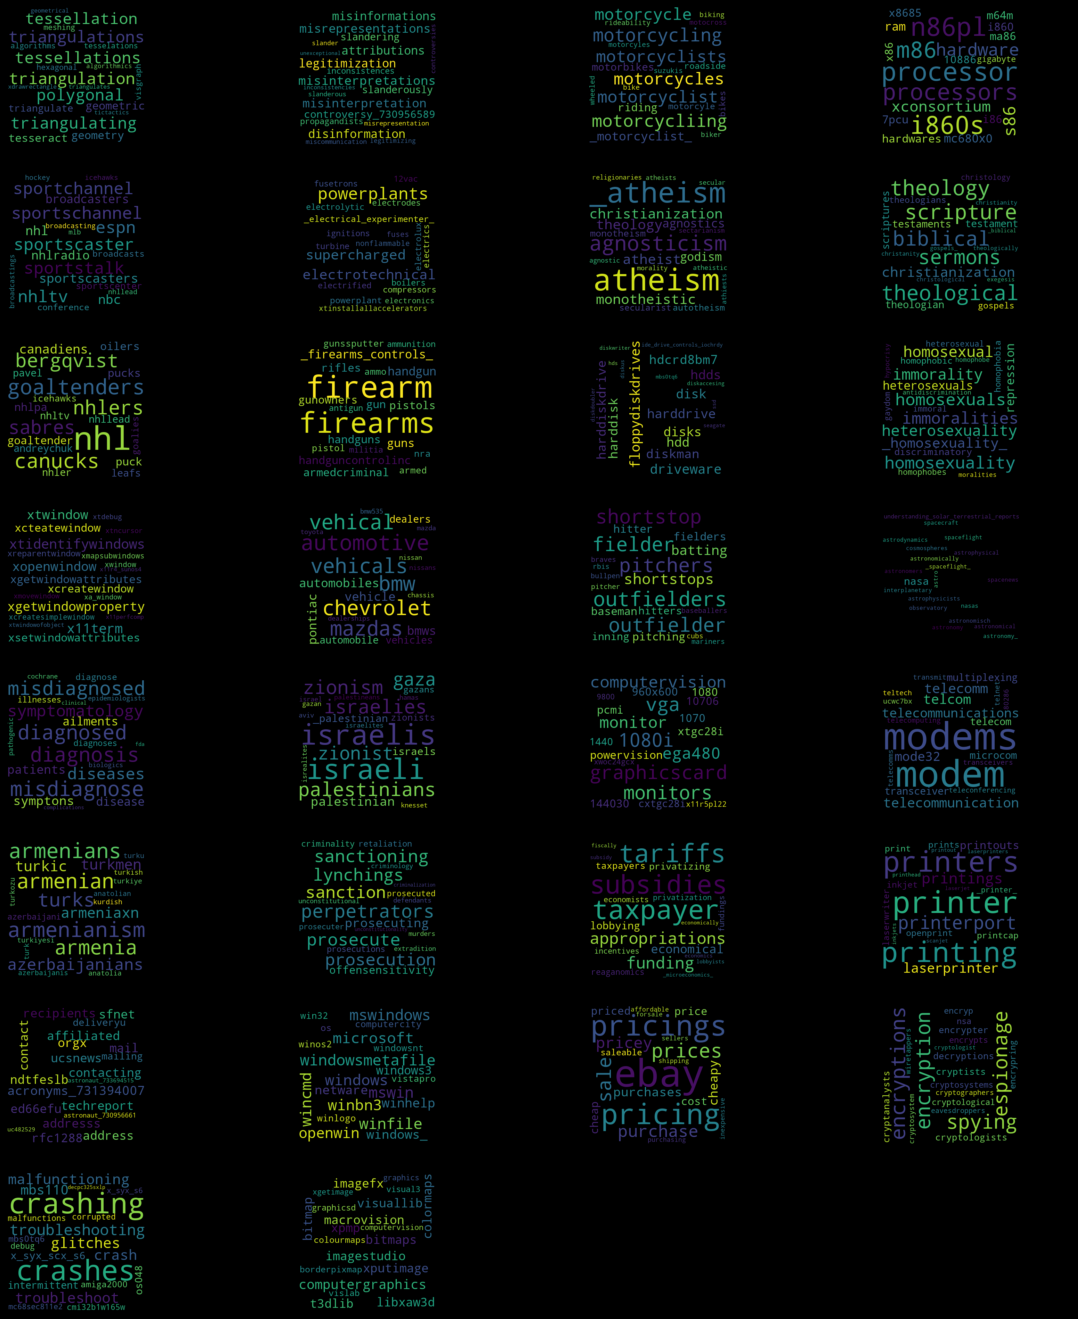

In [140]:
coherence, word_embeddings, words = \
    train_bert.get_coherence(
        newsgroup_bert,
        publications_bert_train_abstracts=newsgroups_preprocessed['abstract_text_clean'],
        word_embeddings=word_embeddings, words=words, coherence="c_npmi",
        plot=True, figsize=(20, 24), top_words=20)
print(f"Coherence = {coherence}")

In [118]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [128]:
topic_associations = {
    0: 'comp.graphics',
    1: 'talk.politics.misc',
    2: 'rec.motorcycles',
    3: 'comp.sys.ibm.pc.hardware',
    4: 'rec.sport.hockey',
    5: 'sci.electronics',
    6: 'alt.atheism',
    7: 'soc.religion.christian',
    8: 'rec.sport.hockey',
    9: 'talk.politics.guns',
    10: 'comp.sys.ibm.pc.hardware',
    11: 'talk.religion.misc',
    12: 'comp.sys.mac.hardware',
    13: 'rec.autos',
    14: 'rec.sport.baseball',
    15: 'sci.space',
    16: 'sci.med',
    17: 'talk.politics.mideast',
    18: 'comp.graphics',
    19: 'sci.electronics',
    20: 'talk.politics.mideast',
    21: 'talk.politics.misc',
    22: 'talk.politics.misc',
    23: 'comp.sys.ibm.pc.hardware',
    24: 'sci.crypt',
    25: 'comp.os.ms-windows.misc',
    26: 'misc.forsale',
    27: 'sci.crypt',
    28: 'comp.windows.x',
    29: 'comp.graphics'
}

In [119]:
%reload common
import common

X = common.series_to_matrix(newsgroups_preprocessed['feature'])

In [132]:
topic_names = [topic_associations[idx] for idx in newsgroup_bert.kmeans.predict(X).tolist()]
topic_ids = [newsgroups_train.target_names.index(topic_name) for topic_name in topic_names]
topic_ids

[7,
 3,
 3,
 1,
 14,
 16,
 13,
 3,
 2,
 3,
 7,
 0,
 3,
 14,
 6,
 18,
 1,
 7,
 12,
 4,
 0,
 10,
 6,
 2,
 3,
 12,
 11,
 9,
 0,
 7,
 7,
 13,
 18,
 17,
 19,
 10,
 8,
 11,
 8,
 16,
 19,
 11,
 5,
 9,
 9,
 6,
 12,
 8,
 12,
 14,
 4,
 15,
 3,
 13,
 17,
 11,
 8,
 10,
 2,
 14,
 11,
 4,
 3,
 6,
 7,
 0,
 11,
 18,
 0,
 6,
 17,
 16,
 12,
 12,
 3,
 12,
 11,
 7,
 2,
 5,
 18,
 18,
 1,
 11,
 7,
 3,
 5,
 1,
 10,
 3,
 3,
 17,
 3,
 5,
 14,
 8,
 18,
 4,
 15,
 1,
 2,
 3,
 8,
 5,
 17,
 12,
 12,
 12,
 1,
 6,
 19,
 12,
 3,
 18,
 10,
 17,
 13,
 11,
 4,
 14,
 0,
 8,
 3,
 15,
 0,
 18,
 19,
 16,
 9,
 8,
 6,
 13,
 6,
 17,
 18,
 0,
 9,
 3,
 11,
 19,
 13,
 9,
 1,
 8,
 1,
 13,
 2,
 18,
 15,
 18,
 1,
 14,
 17,
 14,
 3,
 6,
 7,
 15,
 2,
 0,
 17,
 16,
 3,
 15,
 9,
 12,
 6,
 11,
 11,
 12,
 19,
 1,
 10,
 6,
 10,
 4,
 11,
 13,
 3,
 9,
 13,
 7,
 13,
 8,
 3,
 3,
 9,
 1,
 12,
 12,
 1,
 11,
 11,
 13,
 5,
 5,
 12,
 19,
 16,
 6,
 16,
 7,
 18,
 19,
 11,
 18,
 5,
 12,
 10,
 12,
 0,
 4,
 16,
 3,
 1,
 13,
 7,
 3,
 13,
 17,
 2,
 0,
 11,

In [137]:
newsgroups_train.target

19

In [139]:
print(newsgroups_train.data[1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [122]:
import umap

In [123]:
reducer = umap.UMAP(n_components=2, min_dist=0, metric='euclidean')
Xp = reducer.fit_transform(X, newsgroups_train.target)
Xp

array([[ 1.2487831,  4.2744694],
       [11.869824 , -6.808628 ],
       [11.267355 , -6.2323337],
       ...,
       [ 7.924714 , -1.7554646],
       [-0.8815725, -7.076441 ],
       [-3.5381868, -2.8538337]], dtype=float32)

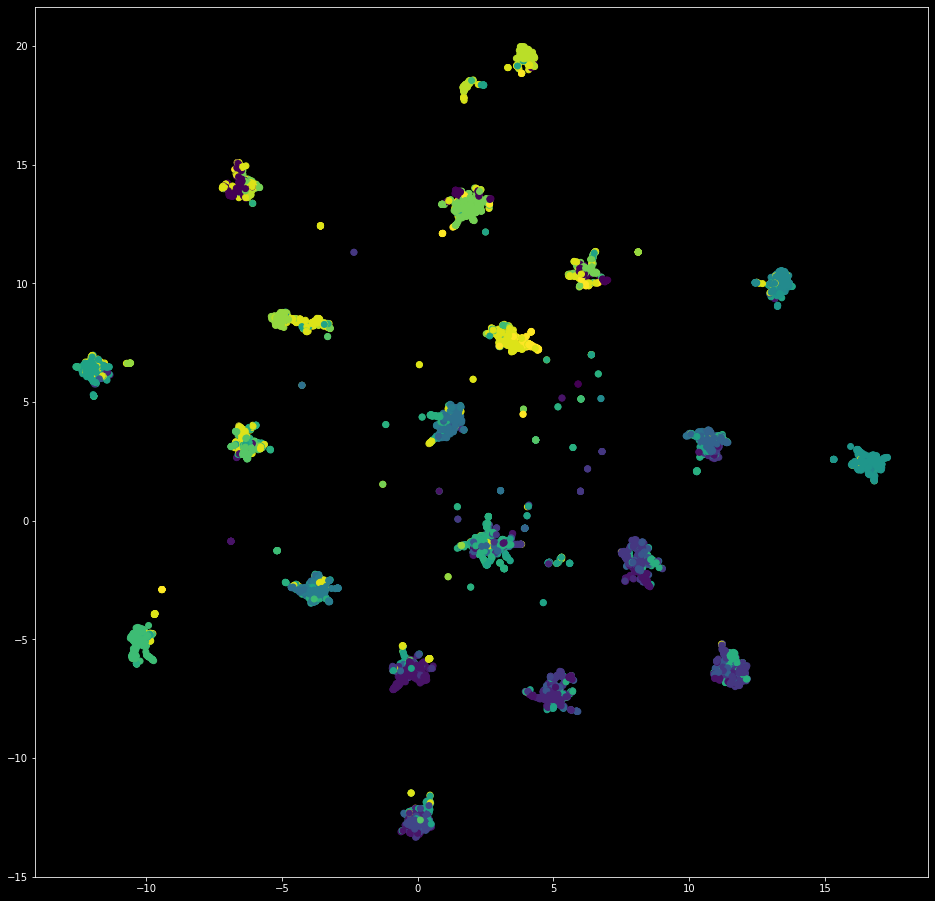

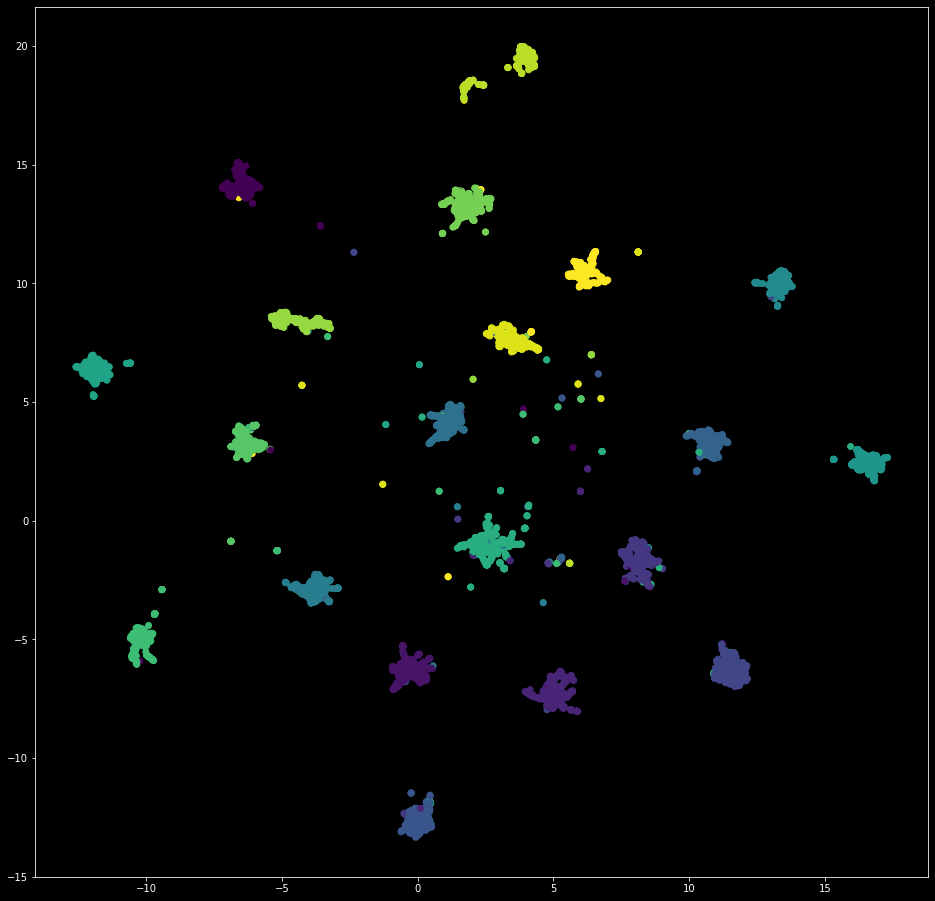

In [138]:
plt.figure(figsize=(16, 16))
plt.scatter(Xp[:, 0], Xp[:, 1], c=topic_ids)
plt.figure(figsize=(16, 16))
plt.scatter(Xp[:, 0], Xp[:, 1], c=newsgroups_train.target)